## Task 1: Store Format for Existing Stores

- Determine the optimal number of store formats based on sales data.
- Use percentage sales per category per store for clustering (category sales as a percentage of total store sales).
- Use only 2015 sales data.
- Use a K-means clustering model.
- Segment the 85 current stores into the different store formats.
- Use the StoreSalesData.csv and StoreInformation.csv files.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
store = pd.read_csv("storedemographicdata.csv")
info = pd.read_csv("storeinformation.csv")
sales = pd.read_csv("storesalesdata.csv")

In [3]:
store.head()

,Store,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,...,PopPacIsl,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens
0,S0001,0.138163,0.111414,0.113228,0.081671,0.134924,0.128832,0.160429,0.131359,0.241935,...,0.002669,0.454295,0.073853,0.115967,0.223511,0.301880,0.180786,0.097168,0.006836,4260.943672
1,S0002,0.138954,0.112723,0.100572,0.074832,0.121080,0.146961,0.195456,0.109422,0.125224,...,0.002879,0.729696,0.124956,0.127915,0.206578,0.223808,0.174730,0.129133,0.012879,3061.060073
2,S0003,0.108582,0.091262,0.113486,0.111415,0.182909,0.144938,0.150248,0.097170,0.321860,...,0.000802,0.182080,0.024665,0.065257,0.114870,0.150106,0.155462,0.251445,0.238196,13740.923328
3,S0004,0.142758,0.102582,0.083941,0.062370,0.131661,0.134041,0.158762,0.183922,0.198362,...,0.001904,0.516900,0.175374,0.112920,0.095161,0.247891,0.152583,0.161462,0.054610,2947.367203
4,S0005,0.112396,0.083652,0.091313,0.103056,0.183739,0.146511,0.165692,0.113630,0.164272,...,0.001379,0.396718,0.021852,0.022854,0.070837,0.113448,0.126377,0.208777,0.435855,12124.740209


In [4]:
store.shape

(95, 45)

In [5]:
info.head()

,Store,Address,City,State,Zip,Type
0,S0001,1000 W El Norte Pkwy,Escondido,CA,92027,Existing
1,S0002,12419 Woodside Ave,Lakeside,CA,92040,Existing
2,S0003,1342 N Alvarado St,Los Angeles,CA,90026,Existing
3,S0004,671 S Rancho Santa Fe Rd,San Marcos,CA,92078,Existing
4,S0005,1430 S Fairfax Ave,Los Angeles,CA,90019,Existing


In [6]:
info.shape

(95, 6)

In [7]:
sales.head()

,Store,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
0,S0001,1,3,2012,23401.06,5567.90,3930.28,5223.61,4542.28,238.58,2608.78,1651.77,4304.79
1,S0001,2,3,2012,32442.93,8009.52,4712.31,6174.72,9503.45,245.29,2692.72,2688.89,4467.51
2,S0001,3,3,2012,40433.61,9759.20,5969.03,8010.67,12793.92,282.12,3493.85,2929.85,5721.60
3,S0001,4,3,2012,57043.39,13966.26,9008.24,13142.55,16635.77,316.72,5618.55,4270.38,8313.11
4,S0001,5,3,2012,32894.86,7870.66,5448.35,5459.29,8358.96,198.00,3339.59,2061.21,5280.16


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116232 entries, 0 to 116231
Data columns (total 13 columns):
Store                  116232 non-null object
Day                    116232 non-null int64
Month                  116232 non-null int64
Year                   116232 non-null int64
Dry_Grocery            116232 non-null float64
Dairy                  116232 non-null float64
Frozen_Food            116232 non-null float64
Meat                   116232 non-null float64
Produce                116232 non-null float64
Floral                 116232 non-null float64
Deli                   116232 non-null float64
Bakery                 116232 non-null float64
General_Merchandise    116232 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 11.5+ MB


In [9]:
sales.columns.values

array(['Store', 'Day', 'Month', 'Year', 'Dry_Grocery', 'Dairy',
       'Frozen_Food', 'Meat', 'Produce', 'Floral', 'Deli', 'Bakery',
       'General_Merchandise'], dtype=object)

In [10]:
fields = ['Dry_Grocery', 'Dairy','Frozen_Food', 'Meat','Produce','Floral', 'Deli', 'Bakery','General_Merchandise']
data = sales[sales["Year"]== 2015].loc[:,fields]

In [11]:
data.shape

(30933, 9)

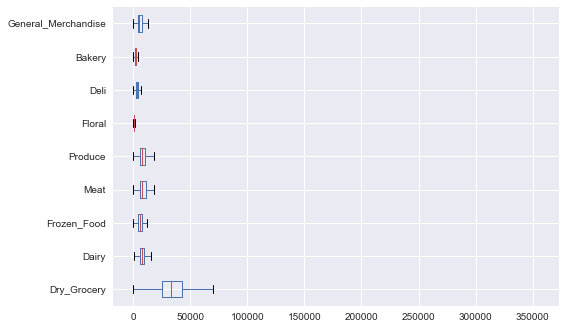

In [12]:
data.plot.box(vert=False)

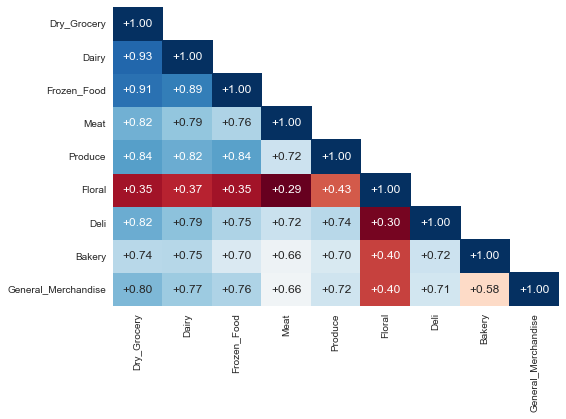

In [13]:
# get the feature correlations
corr = data.corr()

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

In [14]:
data.describe()

,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
count,30933.000000,30933.00000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000
mean,35787.146113,8133.17987,6281.555544,8904.617038,8794.389290,661.678786,3275.658499,2200.968333,5950.909211
std,14247.292627,3129.06324,2429.098435,4795.789628,3968.845596,857.266105,1655.526800,1004.955878,3025.951078
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25465.790000,5964.73000,4534.490000,5790.390000,5993.590000,288.450000,2121.580000,1479.040000,3789.770000
50%,32897.850000,7528.95000,5829.380000,7810.840000,7975.360000,452.970000,2942.230000,1988.200000,5226.240000
75%,43149.100000,9680.12000,7586.300000,10867.930000,10741.010000,721.670000,4065.710000,2696.250000,7319.110000
max,263224.800000,36901.12000,59747.760000,355587.600000,39769.390000,13773.870000,75606.020000,8791.490000,48480.370000


## data scale by normalization and transform by PCA

In [15]:
from sklearn.preprocessing import Normalizer
scale = Normalizer()
for field in fields:
    data = pd.DataFrame(scale.fit_transform(data))

In [16]:
data.describe()

,0,1,2,3,4,5,6,7,8
count,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000
mean,0.892928,0.205569,0.158559,0.218090,0.219364,0.016354,0.080720,0.055865,0.147301
std,0.023093,0.026115,0.021335,0.040026,0.046566,0.020639,0.019200,0.016354,0.038632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.881627,0.189497,0.145784,0.191402,0.185829,0.008611,0.069448,0.044029,0.120951
50%,0.894566,0.203795,0.158246,0.214077,0.214632,0.012164,0.078991,0.054409,0.140611
75%,0.906269,0.220161,0.170643,0.240729,0.248721,0.017289,0.089426,0.065326,0.167160
max,0.998982,0.936278,0.815010,0.997677,0.657833,0.361735,0.734127,0.310380,0.812885


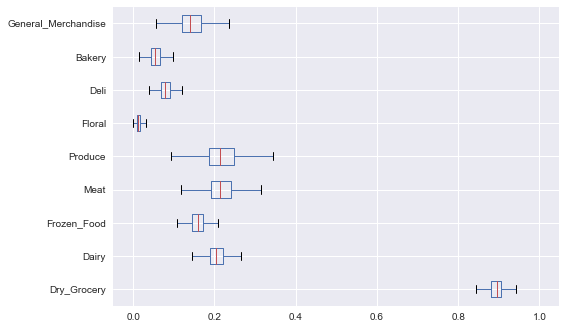

In [17]:
data.columns = fields
data.plot.box(vert=False)

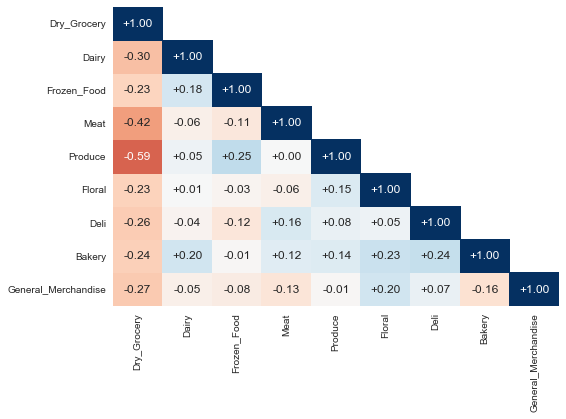

In [18]:
# get the feature correlations
corr = data.corr()

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

In [19]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_data = pca.fit_transform(data)

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.3103675 ,  0.53400522,  0.72288948,  0.81805438,  0.87765843])

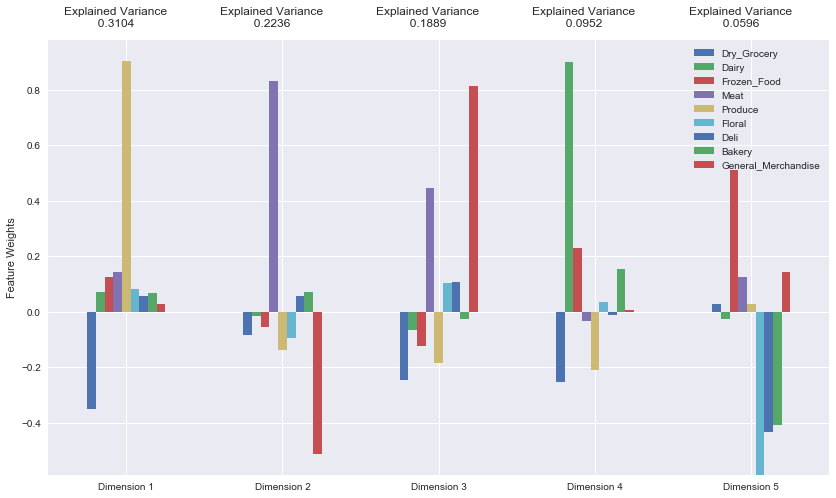

In [21]:
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# PCA components
components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
components.index = dimensions

# PCA explained variance
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,8))

# Plot the feature weights as a function of the components
components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)

# Display the explained variance ratios
for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

In [ ]:
from sklearn.cluster import KMeans
from time import time
t0 = time()
model = KMeans(n_clusters=2, random_state=0)
model.fit(pca_data)
centers = model.cluster_centers_

# sample_preds = clusterer.predict(data.iloc[0:5,:])

# TODO: Calculate the mean silhouette coefficient 
from sklearn.metrics import silhouette_score
preds = model.predict(pca_data)
score = silhouette_score(data,preds)
print(time()-t0,score)

In [ ]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.

    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)

    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'],
        facecolors='b', edgecolors='b', s=70, alpha=0.5)

    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1],
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black',
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
biplot(data,pca_data,pca)

 I realize I do pca use the wrong scale, I should not use normaliztion across the same category, I should do it accross the same store, or percentage.

## Task 2: Determine the Store Format for New Stores

- Develop a model that predicts which segment a store falls into based on the **demographic and socioeconomic characteristics of the population** that resides in the area around each new store.
- Use a 20% validation sample with Random Seed = 3 when creating samples with which to compare the accuracy of the models. Make sure to compare a decision tree, forest, and boosted model.
- Use the model to predict the best store format for each of the 10 new stores.